In [1]:
# Up to this point we have not used R, but now we can no longer avoid that
# The arules pachage for R is the best around, by any industry standard# This notebook uses 
# pure R code--the kernel for R should be installed

library('mlbench')

data(Zoo) # load up an R DataFrame
head(Zoo) # print part of it from R

Warning message:
"package 'mlbench' was built under R version 3.6.1"

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
aardvark,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
antelope,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
bass,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,0,TRUE,FALSE,FALSE,fish
bear,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,FALSE,FALSE,TRUE,mammal
boar,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal
buffalo,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,4,TRUE,FALSE,TRUE,mammal


## Using R with apriori
Using the r magics in iPython is a much easier and more consistent use of R coding.

In [2]:
# load up some zoo data
data(Zoo)
library(arules)

# make the "legs" attirbute binary
has_legs <- Zoo["legs"]>0
Zoo[["legs"]] <- as.factor(has_legs)

# convert to transactions, where column indicates the output of the attribute
# so "hair" as an attribute would generate two columns -> "hair=TRUE and hair=FALSE"
trans <- as(Zoo, "transactions")

# Now that we have transactions, its time to run the apriori algorithm
isets <- apriori(trans, parameter=list(target="frequent", support=0.5))

# sort it and display some of the frequent itemsets from apriori
isets <- sort(isets, by="support") 
inspect(head(isets, n=10))
length(isets)

Warning message:
"package 'arules' was built under R version 3.6.1"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.1"
Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write



Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen            target   ext
     10 frequent itemsets FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 50 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [21 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     items                         support   count
[1]  {backbone}                    0.8217822 83   
[2]  {breathes}                    0.7920792 80   
[3]  {legs=TRUE}                   0.7722772 78   
[4]  {tail}                        0.7425743 75   
[5]  {backbo

[1] 21

In [3]:
# Do same thing, getting only the maximal sets
is_max <- isets[is.maximal(isets)]
inspect(head(sort(is_max, by="support")))
length(is_max)

    items                              support   count
[1] {eggs}                             0.5841584 59   
[2] {predator}                         0.5544554 56   
[3] {backbone,breathes,legs=TRUE,tail} 0.5544554 56   
[4] {toothed,backbone,tail}            0.5148515 52   


[1] 4

In [4]:
# generate some rules from the frequent itemsets
rules <- apriori(trans, parameter=list(support=.5, confidence=.9))

inspect(head(rules, n=10))

# print out measures of rule quality
quality(head(rules))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.9    0.1    1 none FALSE            TRUE       5     0.5      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 50 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[24 item(s), 101 transaction(s)] done [0.00s].
sorting and recoding items ... [7 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [14 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                     rhs         support   confidence lift     count
[1]  {toothed}            => {backbone}  0.6039604 1.0000000  1.216867 61   
[2]  {legs=TRUE}          => {breathes}  0.7227723 0.9358974  1.181571 73   
[3]  {breathes}           => {legs=TRUE} 0.7227723 0.9125

support,confidence,lift,count
0.6039604,1.0000000,1.216867,61
0.7227723,0.9358974,1.181571,73
0.7227723,0.9125000,1.181571,73
0.7326733,0.9866667,1.200643,74
0.5148515,1.0000000,1.216867,52
0.5643564,1.0000000,1.262500,57


In [5]:
# sort out the rules and print additional "interest" measures
rules <- sort(rules, by="lift")
inspect(head(rules, n=10))
interestMeasure(rules[1:10], method=c("phi", "gini"), trans=trans)

     lhs                          rhs         support   confidence lift    
[1]  {legs=TRUE,tail}          => {breathes}  0.5643564 1.0000000  1.262500
[2]  {backbone,legs=TRUE}      => {breathes}  0.6336634 1.0000000  1.262500
[3]  {backbone,legs=TRUE,tail} => {breathes}  0.5544554 1.0000000  1.262500
[4]  {toothed}                 => {backbone}  0.6039604 1.0000000  1.216867
[5]  {toothed,tail}            => {backbone}  0.5148515 1.0000000  1.216867
[6]  {breathes,tail}           => {legs=TRUE} 0.5643564 0.9344262  1.209962
[7]  {backbone,breathes,tail}  => {legs=TRUE} 0.5544554 0.9333333  1.208547
[8]  {backbone,breathes}       => {legs=TRUE} 0.6336634 0.9275362  1.201041
[9]  {tail}                    => {backbone}  0.7326733 0.9866667  1.200643
[10] {breathes,tail}           => {backbone}  0.5940594 0.9836066  1.196919
     count
[1]  57   
[2]  64   
[3]  56   
[4]  61   
[5]  52   
[6]  57   
[7]  56   
[8]  64   
[9]  74   
[10] 60   


Warning message in interestMeasure(rules[1:10], method = c("phi", "gini"), trans = trans):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecate

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):
"interestMeasure: parameter method is now deprecated! Use measure instead!"Warning message in interestMeasure(x, m, transactions, reuse, ...):

Warning message:
"package 'arulesViz' was built under R version 3.6.1"Loading required package: grid
Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus
To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


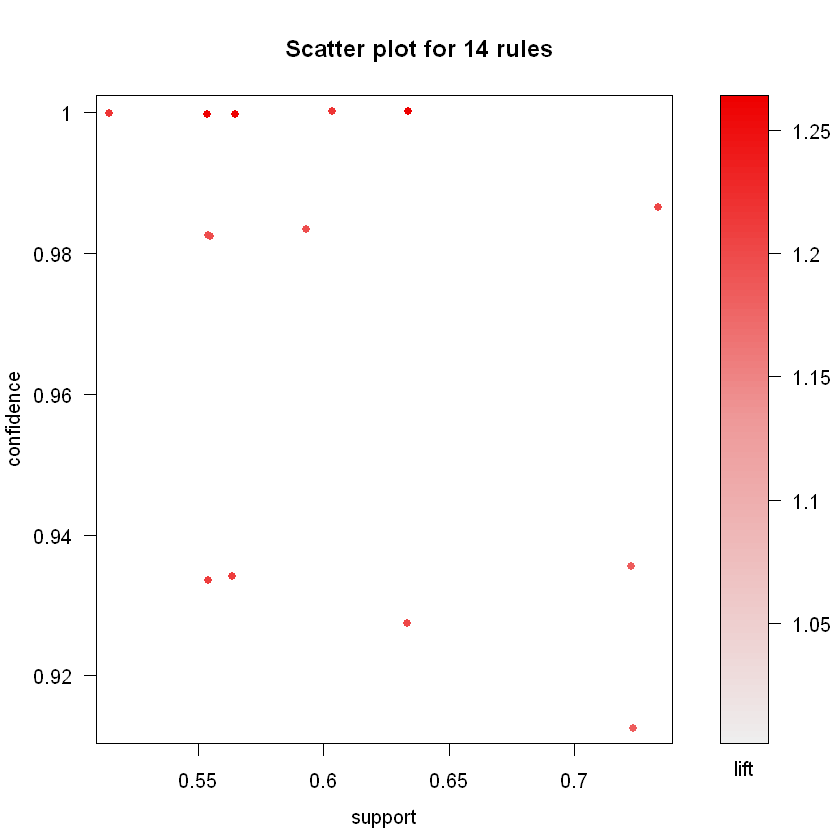

In [6]:
# visualize the different rules, 
#  the first visualization might take some time to render properly
library(arulesViz)
plot(rules)

     lhs                          rhs         support   confidence lift    
[1]  {legs=TRUE,tail}          => {breathes}  0.5643564 1.0000000  1.262500
[2]  {backbone,legs=TRUE}      => {breathes}  0.6336634 1.0000000  1.262500
[3]  {backbone,legs=TRUE,tail} => {breathes}  0.5544554 1.0000000  1.262500
[4]  {toothed}                 => {backbone}  0.6039604 1.0000000  1.216867
[5]  {toothed,tail}            => {backbone}  0.5148515 1.0000000  1.216867
[6]  {breathes,tail}           => {legs=TRUE} 0.5643564 0.9344262  1.209962
[7]  {backbone,breathes,tail}  => {legs=TRUE} 0.5544554 0.9333333  1.208547
[8]  {backbone,breathes}       => {legs=TRUE} 0.6336634 0.9275362  1.201041
[9]  {tail}                    => {backbone}  0.7326733 0.9866667  1.200643
[10] {breathes,tail}           => {backbone}  0.5940594 0.9836066  1.196919
[11] {legs=TRUE,tail}          => {backbone}  0.5544554 0.9824561  1.195519
[12] {breathes,legs=TRUE,tail} => {backbone}  0.5544554 0.9824561  1.195519
[13] {legs=T

[1] 14

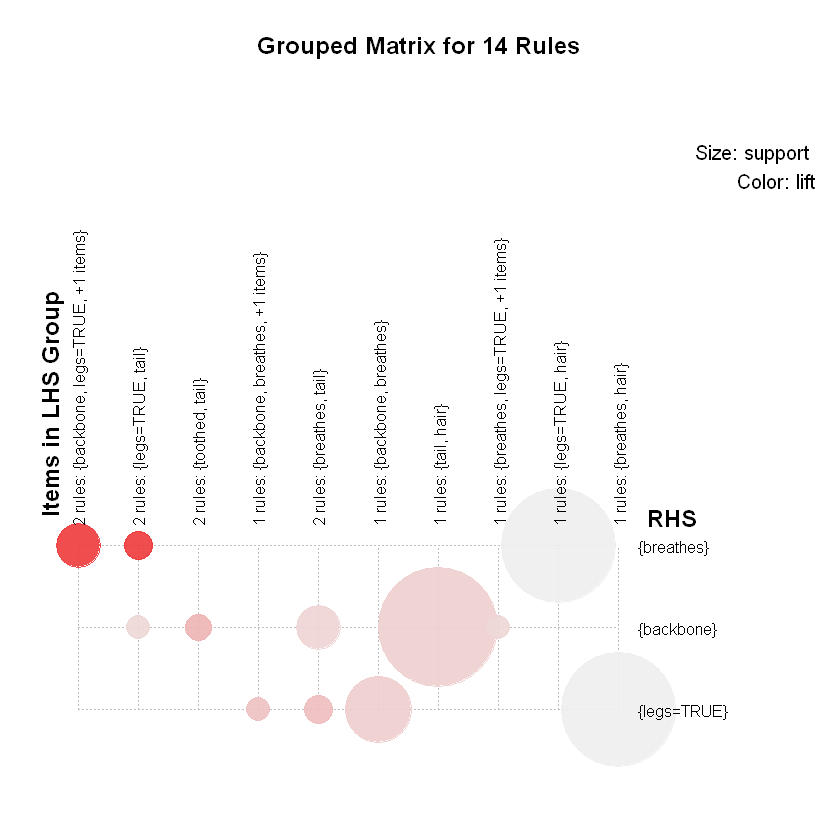

In [7]:
# a great plot
plot(rules, method="grouped")
inspect(rules)
length(rules)

     lhs                                  rhs            support     confidence
[1]  {Class=2nd,Age=Child}             => {Survived=Yes} 0.010904134 1.0000000 
[2]  {Class=2nd,Sex=Female,Age=Child}  => {Survived=Yes} 0.005906406 1.0000000 
[3]  {Class=1st,Sex=Female}            => {Survived=Yes} 0.064061790 0.9724138 
[4]  {Class=1st,Sex=Female,Age=Adult}  => {Survived=Yes} 0.063607451 0.9722222 
[5]  {Class=2nd,Sex=Female}            => {Survived=Yes} 0.042253521 0.8773585 
[6]  {Class=Crew,Sex=Female}           => {Survived=Yes} 0.009086779 0.8695652 
[7]  {Class=Crew,Sex=Female,Age=Adult} => {Survived=Yes} 0.009086779 0.8695652 
[8]  {Class=2nd,Sex=Female,Age=Adult}  => {Survived=Yes} 0.036347115 0.8602151 
[9]  {Class=2nd,Sex=Male,Age=Adult}    => {Survived=No}  0.069968196 0.9166667 
[10] {Class=2nd,Sex=Male}              => {Survived=No}  0.069968196 0.8603352 
[11] {Class=3rd,Sex=Male,Age=Adult}    => {Survived=No}  0.175829169 0.8376623 
[12] {Class=3rd,Sex=Male}              =

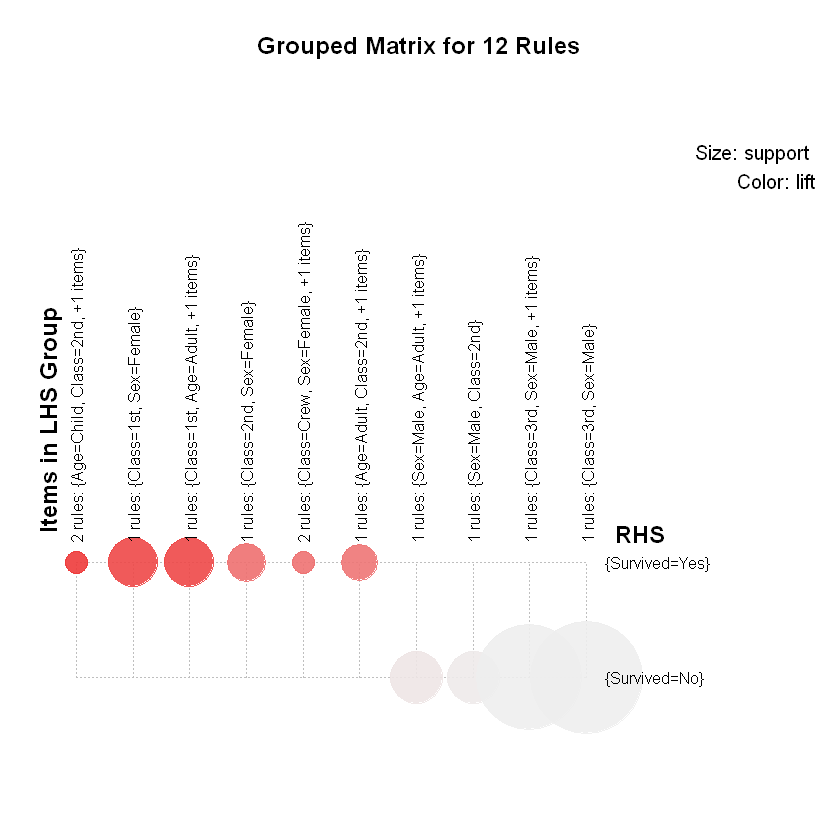

In [8]:
# An extended example using titanic data
# http://www.rdatamining.com/examples/association-rules 
load("ICA5-PartA/titanic2.raw.rdata")
rules <- apriori(titanic.raw,parameter = list(minlen=2, supp=0.005, conf=0.8), appearance = list(rhs=c("Survived=No", "Survived=Yes"), default="lhs"), control = list(verbose=F))
rules.sorted <- sort(rules, by="lift")
plot(rules.sorted, method="grouped")
inspect(rules.sorted, n=10)